In [12]:
!pip install -U sklearn-evaluation --user

In [8]:
!pip install -U seaborn --user

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.1 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.7.1 which is incompatible.



  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)


In [10]:
!pip install -U matplotlib --user

In [13]:
import seaborn as sns

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dlel2\\anaconda3\\lib\\site-packages\\matplotlib.libs\\.load-order-matplotlib-3.7.1'

In [2]:
iris = sns.load_dataset('iris')

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn = KNeighborsClassifier()

In [6]:
# 가장 위부터 영향이 큰 하이퍼파라미터 들이다.
# 하이퍼파라미터 들은 vars하면 알 수 있다.
vars(knn)

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

In [8]:
# 이렇게도 알 수 있다.
# 하이퍼 파라미터 튜닝할 수 있는 것들을 볼 수 있다.
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [22]:
from sklearn.model_selection import train_test_split

In [14]:
# 사이킷런에서는 y에 문자열이 가능하다.
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.species)

In [15]:
# 2개로도 쪼갤 수 있다.
# 이때는 인자를 다르게 준다.

# train, test = train_test_split(iris)

In [16]:
knn = KNeighborsClassifier(3)

In [17]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9473684210526315

In [20]:
temp = []
for i in range(3, 21, 2):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    temp.append((i, knn.score(X_test, y_test)))
temp

[(3, 0.9473684210526315),
 (5, 0.9736842105263158),
 (7, 0.9736842105263158),
 (9, 0.9736842105263158),
 (11, 1.0),
 (13, 1.0),
 (15, 1.0),
 (17, 1.0),
 (19, 0.9736842105263158)]

In [19]:
temp

[(3, 0.9473684210526315),
 (5, 0.9736842105263158),
 (7, 0.9736842105263158),
 (9, 0.9736842105263158),
 (11, 1.0),
 (13, 1.0),
 (15, 1.0),
 (17, 1.0),
 (19, 0.9736842105263158)]

In [2]:
from sklearn.model_selection import learning_curve

In [25]:
# 3개 니까 3개로 받아야겠지?
len(learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.species))

3

In [26]:
train_size, train_score, test_score = \
learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.species)

In [1]:
from sklearn.linear_model import LogisticRegression

In [4]:
train_size, train_score, test_score = \
learning_curve(LogisticRegression(), iris.iloc[:,:-1], iris.species)

NameError: name 'iris' is not defined

In [27]:
import sklearn_evaluation

In [29]:
dir(sklearn_evaluation)

['ClassifierEvaluator',
 'NotebookCollection',
 'NotebookDatabase',
 'NotebookIntrospector',
 'SQLiteTracker',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compute',
 'evaluator',
 'metrics',
 'nb',
 'plot',
 'preprocessing',
 'report',
 'table',
 'telemetry',
 'tracker',
 'util',
 'validate']

In [3]:
from sklearn_evaluation.plot import learning_curve as lc

ImportError: cannot import name 'animation' from partially initialized module 'matplotlib' (most likely due to a circular import) (C:\Users\dlel2\anaconda3\lib\site-packages\matplotlib\__init__.py)

In [31]:
import inspect

In [32]:
print(inspect.getsource(lc))

        def wrapper_func(*args, **kwargs):
            with tmp_theme(ax_style, cmap_style):
                return func(*args, **kwargs)



In [55]:
len(test_score)

5

In [56]:
len(train_score)

5

In [52]:
train_size

array([ 51, 166, 281, 396, 512])

In [123]:
lc(train_score, test_score, train_size)

AttributeError: module 'matplotlib' has no attribute 'colormaps'

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
data = load_breast_cancer(as_frame=True)

In [36]:
breast = data.frame

In [43]:
train_size, train_score, test_score = \
learning_curve(LogisticRegression(solver='newton-cg'), breast.iloc[:,:-1], breast.target, cv=10)

In [49]:
import matplotlib.pyplot as plt

In [58]:
lc(train_score, test_score, train_size)

AttributeError: module 'matplotlib' has no attribute 'colormaps'

In [47]:
import numpy as np

In [ ]:
train_size, train_score, test_score = \
learning_curve(LogisticRegression(solver='newton-cg'), breast.iloc[:,:-1], breast.target, cv=10, train_sizes=np.linspace(0.1, 1.1, 10, ))

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()

In [62]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [77]:
grid = GridSearchCV(KNeighborsClassifier(), 
                    {'n_neighbors' : range(3, 21, 2),
                    'weights' : ['uniform', 'distance']})

In [64]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [78]:
grid.fit(iris.iloc[:,:-1], iris.species)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 21, 2),
                         'weights': ['uniform', 'distance']})

In [79]:
grid.best_index_

9

In [80]:
grid.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [81]:
grid.best_score_

0.9866666666666667

In [82]:
grid.cv_results_

{'mean_fit_time': array([0.00259385, 0.0015975 , 0.00198603, 0.00119681, 0.00313349,
        0.00312524, 0.        , 0.        , 0.        , 0.        ,
        0.00312371, 0.0062489 , 0.00312405, 0.00312395, 0.        ,
        0.        , 0.00312366, 0.        ]),
 'std_fit_time': array([7.99584494e-04, 1.49534506e-03, 1.66981537e-05, 7.45983920e-04,
        6.26697540e-03, 6.25047684e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.24742508e-03, 7.65331444e-03,
        6.24809265e-03, 6.24790192e-03, 0.00000000e+00, 0.00000000e+00,
        6.24732971e-03, 0.00000000e+00]),
 'mean_score_time': array([0.00332394, 0.00362549, 0.00220394, 0.00119638, 0.        ,
        0.        , 0.        , 0.00312414, 0.00312424, 0.00312481,
        0.        , 0.        , 0.        , 0.        , 0.00312462,
        0.00312462, 0.00312424, 0.00311527]),
 'std_score_time': array([0.00091709, 0.00479829, 0.00039513, 0.00074642, 0.        ,
        0.        , 0.        , 

In [70]:
import pandas as pd

In [83]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002594,0.000800,0.003324,0.000917,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,13
1,0.001597,0.001495,0.003625,0.004798,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,13
2,0.001986,0.000017,0.002204,0.000395,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6
3,0.001197,0.000746,0.001196,0.000746,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.966667,1.000000,0.900000,0.966667,1.0,0.966667,0.036515,13
4,0.003133,0.006267,0.000000,0.000000,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,2
5,0.003125,0.006250,0.000000,0.000000,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,2
6,0.000000,0.000000,0.000000,0.000000,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,6
7,0.000000,0.000000,0.003124,0.006248,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6
8,0.000000,0.000000,0.003124,0.006248,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.933333,1.000000,1.000000,0.966667,1.0,0.980000,0.026667,2
9,0.000000,0.000000,0.003125,0.006250,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.966667,1.000000,1.000000,0.966667,1.0,0.986667,0.016330,1


<AxesSubplot:>

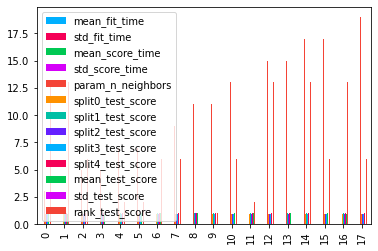

In [85]:
pd.DataFrame(grid.cv_results_, ).plot.bar()

<AxesSubplot:>

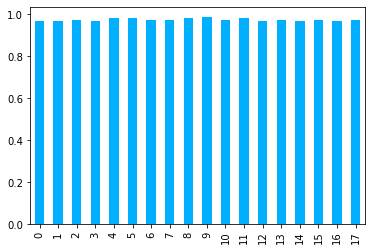

In [84]:
pd.DataFrame(grid.cv_results_, )['mean_test_score'].plot.bar()

In [86]:
!pip install -U imbalanced-learn

In [88]:
import imblearn

In [89]:
from imblearn.over_sampling import RandomOverSampler

In [90]:
rov = RandomOverSampler()

In [92]:
len(rov.fit_resample(iris.iloc[:,:-1], iris.species))

2

In [93]:
re_X, re_y = rov.fit_resample(iris.iloc[:,:-1], iris.species)

In [94]:
re_y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
mpg = sns.load_dataset('mpg')

In [99]:
df = pd.read_csv('./data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [100]:
rov = RandomOverSampler()

In [102]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [105]:
re_X, re_y = rov.fit_resample(df.iloc[:,:-1], df.Class)

In [106]:
re_y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [109]:
re_X[re_X.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,-0.358709,0.159387,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93
568626,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,0.285559,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90
568627,8528.0,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,...,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1.00
568628,75851.0,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,-3.097379,...,0.342122,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,99.85


In [107]:
from sklearn.dummy import DummyClassifier

In [108]:
ss = DummyClassifier()
ss.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

# confusion matrix

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.species)

In [112]:
knn = KNeighborsClassifier()

In [113]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [114]:
confusion_matrix(y_test, knn.predict(X_test))

array([[14,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]], dtype=int64)

<AxesSubplot:>

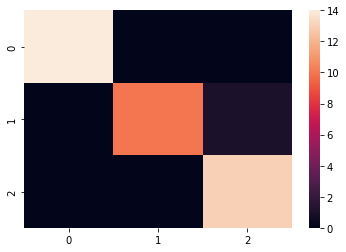

In [115]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), )